In [1]:
import os
import sys
import torch
from pathlib import Path

In [2]:
# DIRECTORIES
from graph_bridges import base_path
#results folder
from graph_bridges import results_path
#data folder 
from graph_bridges import data_path

In [3]:
# CONFIGURATIONS IMPORT
from graph_bridges.configs.graphs.config_sb import SBConfig,SBTrainerConfig
from graph_bridges.configs.graphs.config_sb import SteinSpinEstimatorConfig
from graph_bridges.configs.graphs.config_sb import ParametrizedSamplerConfig
from graph_bridges.configs.graphs.config_sb import get_sb_config_from_file

# DATA CONFIGS
from graph_bridges.data.graph_dataloaders_config import CommunitySmallConfig,EgoConfig
# BACKWARD RATES CONFIGS 
from graph_bridges.models.backward_rates.backward_rate_config import BackRateMLPConfig,GaussianTargetRateImageX0PredEMAConfig

In [4]:
# MODEL IMPORTS
from graph_bridges.models.generative_models.sb import SB
from graph_bridges.models.trainers.sb_training import SBTrainer

All the functionality of a schrodinger bridge is integrated in the class SB

#from graph_bridges.models.generative_models.sb import SB

The Schrodinger Bridge problem requieres essentially 3 elements for model building
    -P0, which is the sb.data_dataloader
    -P1 which is the sb.target_dataloader
    -The reference process which defines a measure Q:
     sb.reference_process

It requieres 2 models (architectures to be trained)
    -sb
    
Following the diffusers library architectures, it requieres a Scheduler and a Pipeline for Inference (Generation)

In [5]:
#===========================================
# MODEL SET UP
#===========================================
sb_config = SBConfig(delete=True,
                     experiment_name="graph",
                     experiment_type="sb",
                     experiment_indentifier="tutorial_sb_trainer")
"""
The results are stored in results_path/experiment_name/experiment_type/experiment_indentifier
if experiment_indentifier is set to None a timenumber (UNIXTIME) is created
"""

sb_config.data = EgoConfig(as_image=False,batch_size=20,full_adjacency=False)
sb_config.model = BackRateMLPConfig(time_embed_dim=14, hidden_layer=150)
sb_config.stein = SteinSpinEstimatorConfig(stein_sample_size=10)
sb_config.sampler = ParametrizedSamplerConfig(num_steps=5)
sb_config.trainer = SBTrainerConfig(learning_rate=1e-3,
                                    num_epochs=30,
                                    save_metric_epochs=10,
                                    save_model_epochs=10,
                                    save_image_epochs=10,
                                    device="cuda:0",
                                    metrics=["graphs_plots","histograms"])

cuda:0


5it [00:01,  4.00it/s]
5it [00:00, 1002.65it/s]
5it [00:00, 767.82it/s]
5it [00:00, 716.34it/s]
5it [00:00, 837.69it/s]
5it [00:00, 385.58it/s]
5it [00:00, 666.84it/s]
5it [00:00, 640.04it/s]
5it [00:00, 785.21it/s]
5it [00:00, 668.29it/s]
5it [00:00, 446.62it/s]
5it [00:00, 382.11it/s]
5it [00:00, 552.71it/s]
5it [00:00, 381.52it/s]
5it [00:00, 893.96it/s]
5it [00:00, 802.86it/s]
5it [00:00, 958.52it/s]
5it [00:00, 692.70it/s]
5it [00:00, 357.78it/s]
  0%|                                                                                                | 0/30 [00:00<?, ?it/s]
5it [00:00, 835.49it/s]

5it [00:00, 713.44it/s]

5it [00:00, 769.74it/s]

5it [00:00, 666.69it/s]

5it [00:00, 822.96it/s]

5it [00:00, 626.65it/s]

5it [00:00, 716.22it/s]

5it [00:00, 671.67it/s]

5it [00:00, 716.22it/s]

5it [00:00, 716.24it/s]

5it [00:00, 693.64it/s]

5it [00:00, 716.29it/s]

5it [00:00, 380.24it/s]

5it [00:00, 768.64it/s]

5it [00:00, 724.18it/s]

5it [00:00, 641.35it/s]
  3%|██▉            

Epoch: 1, Loss: -0.10995882329201337



5it [00:00, 653.40it/s]

5it [00:00, 806.01it/s]

5it [00:00, 837.29it/s]

5it [00:00, 716.02it/s]

5it [00:00, 729.82it/s]

5it [00:00, 716.19it/s]

5it [00:00, 835.55it/s]

5it [00:00, 809.12it/s]

5it [00:00, 716.19it/s]

5it [00:00, 556.76it/s]

5it [00:00, 770.16it/s]

5it [00:00, 716.36it/s]

5it [00:00, 716.29it/s]

5it [00:00, 776.64it/s]

5it [00:00, 941.14it/s]

5it [00:00, 716.19it/s]
  7%|█████▊                                                                                  | 2/30 [00:00<00:07,  3.69it/s]
5it [00:00, 835.59it/s]

5it [00:00, 835.62it/s]

5it [00:00, 835.59it/s]

5it [00:00, 716.22it/s]

5it [00:00, 835.62it/s]

5it [00:00, 716.17it/s]

5it [00:00, 716.22it/s]

5it [00:00, 659.71it/s]

5it [00:00, 579.32it/s]

5it [00:00, 812.47it/s]

5it [00:00, 744.44it/s]

5it [00:00, 792.28it/s]

5it [00:00, 692.59it/s]

5it [00:00, 716.19it/s]

5it [00:00, 673.57it/s]

5it [00:00, 759.87it/s]
 10%|████████▊                                                              

Epoch: 11, Loss: -0.05777023491292704



5it [00:00, 716.29it/s]

5it [00:00, 695.97it/s]

5it [00:00, 667.93it/s]

5it [00:00, 716.24it/s]

5it [00:00, 626.69it/s]

5it [00:00, 626.67it/s]

5it [00:00, 716.41it/s]

5it [00:00, 667.03it/s]

5it [00:00, 716.98it/s]

5it [00:00, 716.00it/s]

5it [00:00, 716.24it/s]

5it [00:00, 719.88it/s]

5it [00:00, 629.08it/s]

5it [00:00, 670.72it/s]

5it [00:00, 716.14it/s]

5it [00:00, 716.14it/s]
 40%|██████████████████████████████████▊                                                    | 12/30 [00:05<00:10,  1.64it/s]
5it [00:00, 716.24it/s]

5it [00:00, 629.38it/s]

5it [00:00, 719.90it/s]

5it [00:00, 835.62it/s]

5it [00:00, 831.05it/s]

5it [00:00, 716.29it/s]

5it [00:00, 835.45it/s]

5it [00:00, 716.17it/s]

5it [00:00, 501.39it/s]

5it [00:00, 455.88it/s]

5it [00:00, 501.40it/s]

5it [00:00, 831.05it/s]

5it [00:00, 621.40it/s]

5it [00:00, 588.56it/s]

5it [00:00, 713.00it/s]

5it [00:00, 831.25it/s]
 43%|█████████████████████████████████████▋                                 

Epoch: 21, Loss: -0.7450261430452629



5it [00:00, 835.59it/s]

5it [00:00, 624.10it/s]

5it [00:00, 717.98it/s]

5it [00:00, 712.30it/s]

5it [00:00, 713.56it/s]

5it [00:00, 712.64it/s]

5it [00:00, 712.76it/s]

5it [00:00, 626.58it/s]

5it [00:00, 716.90it/s]

5it [00:00, 713.29it/s]

5it [00:00, 713.51it/s]

5it [00:00, 712.59it/s]

5it [00:00, 627.38it/s]

5it [00:00, 626.71it/s]

5it [00:00, 716.24it/s]

5it [00:00, 716.44it/s]
 73%|███████████████████████████████████████████████████████████████▊                       | 22/30 [00:10<00:04,  1.67it/s]
5it [00:00, 716.14it/s]

5it [00:00, 712.90it/s]

5it [00:00, 713.78it/s]

5it [00:00, 712.59it/s]

5it [00:00, 716.26it/s]

5it [00:00, 557.03it/s]

5it [00:00, 626.60it/s]

5it [00:00, 589.04it/s]

5it [00:00, 716.14it/s]

5it [00:00, 712.71it/s]

5it [00:00, 712.61it/s]

5it [00:00, 713.61it/s]

5it [00:00, 622.76it/s]

5it [00:00, 586.55it/s]

5it [00:00, 713.49it/s]

5it [00:00, 712.42it/s]
 77%|██████████████████████████████████████████████████████████████████▋    

tensor(1.2244, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)

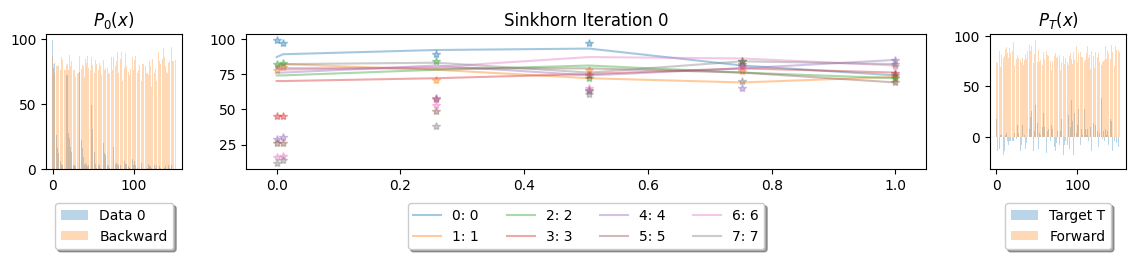

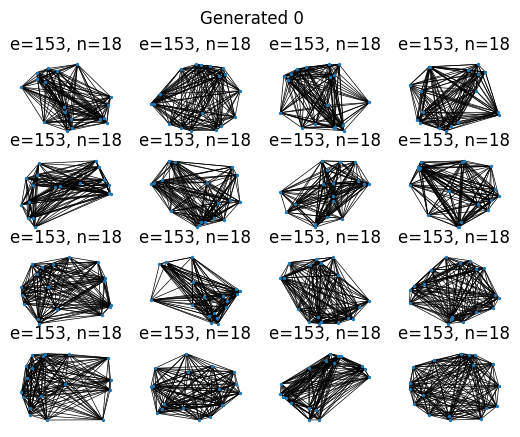

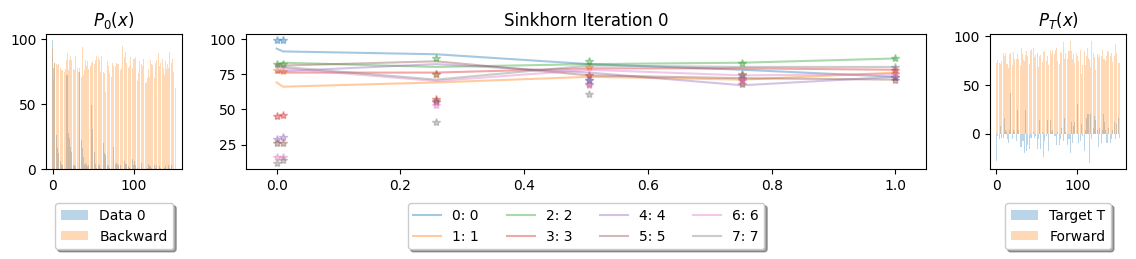

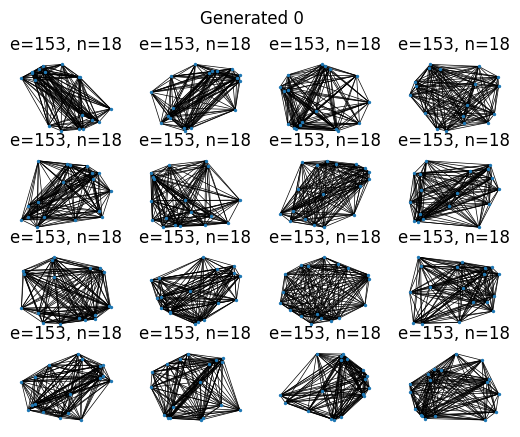

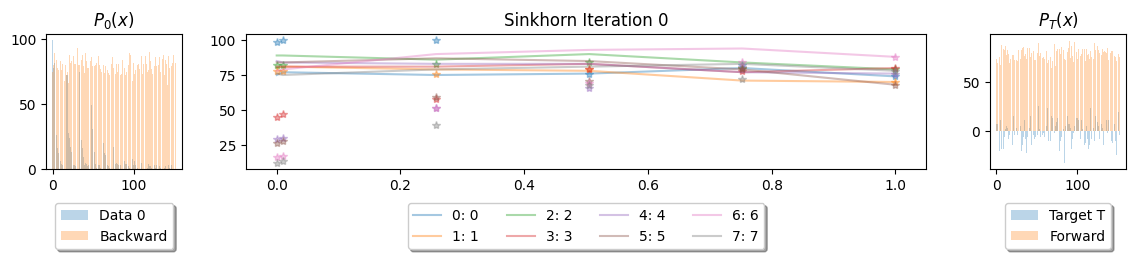

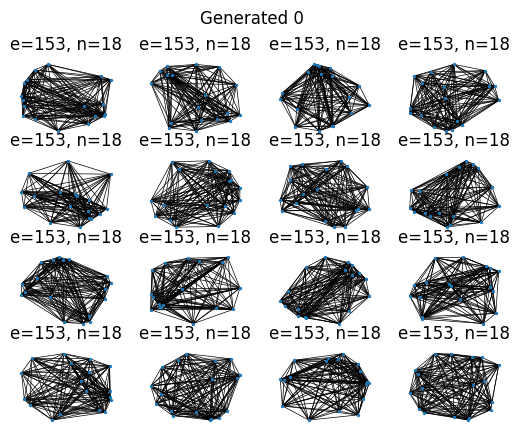

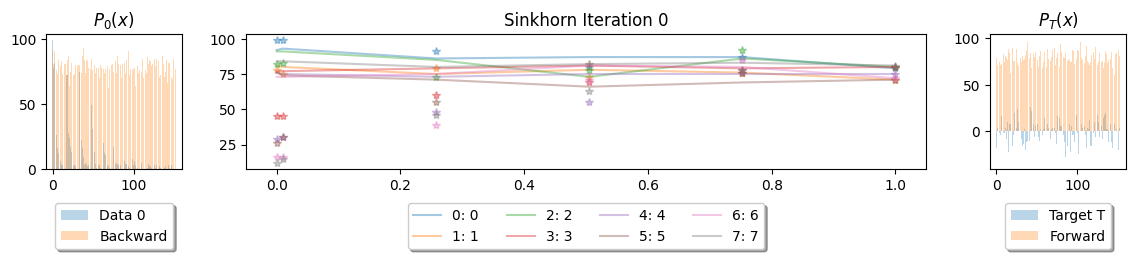

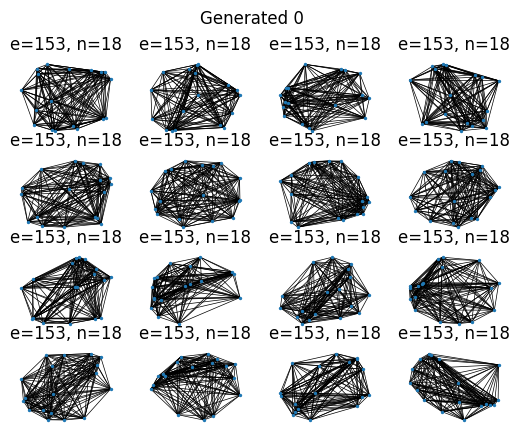

In [6]:
#========================================
# TRAIN
#========================================
sb_trainer = SBTrainer(sb_config)
sb_trainer.train_schrodinger()

In [27]:
sb_trained = SB()
sb_trained.load_from_results_folder(experiment_name="graph",
                                    experiment_type="sb",
                                    experiment_indentifier="tutorial_sb_trainer",
                                    sinkhorn_iteration_to_load=0)

In [28]:
sb_trained.past_model

BackRateMLP(
  (f1): Linear(in_features=153, out_features=150, bias=True)
  (f2): Linear(in_features=164, out_features=306, bias=True)
)

In [29]:
x_end = sb_trained.pipeline(None, 
                            0, 
                            torch.device("cpu"), 
                            sample_size=32, 
                            return_path=False)

5it [00:00, 835.62it/s]


In [11]:
#the results are as spins
x_end.min(),x_end.max()

(tensor(-1.), tensor(1.))

In [30]:
x_adj = sb_trained.data_dataloader.transform_to_graph(x_end)

In [32]:
x_end

tensor([[-1., -1., -1.,  ..., -1.,  1.,  1.],
        [-1.,  1., -1.,  ..., -1.,  1.,  1.],
        [ 1., -1.,  1.,  ...,  1.,  1., -1.],
        ...,
        [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
        [-1.,  1., -1.,  ...,  1.,  1., -1.],
        [-1.,  1.,  1.,  ..., -1., -1., -1.]])

False

True